In [ ]:
# Installation der Packages
!pip install igraph==0.9.8
!apt install libcairo2-dev
!pip install pycairo
!pip install matplotlib

     |████████████████████████████████| 3.2 MB 5.0 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-com

# Packages Laden

In [ ]:
from igraph import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Willkommen zum vierten Python-Problem Set in diesem Modul!  
Sie finden hier zwei Aufgaben (*Exercise 7* und *Exercise 8*) zu Inhalten aus Kapitel 3 *Social Network Analysis* - konkret zu den Teilen 3.3 *Communities in Netzwerken* und 3.4 *Information Diffusion in sozialen Netzwerken*.

# Exercise 7 -- Communities in Netzwerken

Rufen Sie sich das Netzwerk *karate* zurück in Erinnerung, indem Sie den folgenden Code ausführen.

### Aufgabe 7.1

In [ ]:
# {"7_1"}
# Import des Karate Netzwerks
karate = pd.read_csv('https://raw.githubusercontent.com/larsmoe/SAPS-BSDA-Kurs/master/Problemsets%20Python/PS_Nr_2_Python/data/Karate/KARATE.csv', sep=";", header=None, names=['A','B'])
karate = karate.subtract(1)

In [ ]:
def create_edge_list(node_list1, node_list2):
    edge_list = []
    for node_1, node_2 in zip(node_list1, node_list2):
        edge = (node_1, node_2)
        edge_list.append(edge)
    return edge_list

In [ ]:
karate_edges = create_edge_list(karate['A'].to_list(), karate['B'].to_list())

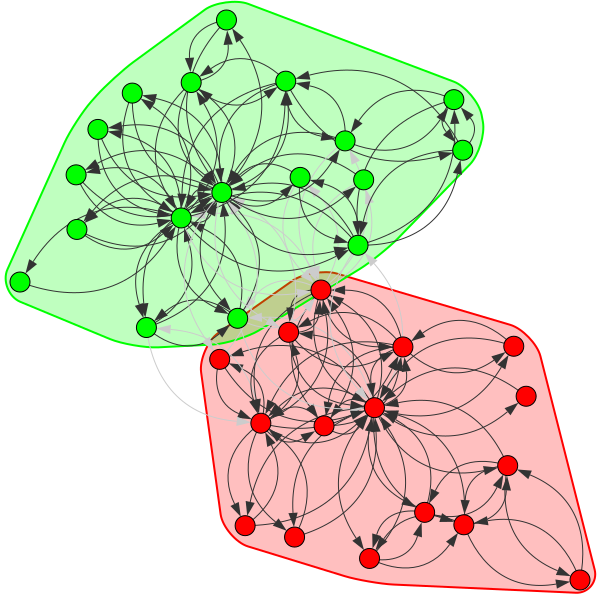

In [ ]:
# Erzeugung des Karate Graphs
graph_karate = Graph(edges=karate_edges, directed=True)

# Plotten des Graphen karate
plot(graph_karate.community_label_propagation(weights=None), mark_groups=True)

Wie Sie sehen können, sind die Knoten des Graphen - die Teilnehmer des Karateclubs - in zwei verschiedenen Farben dargestellt. Sie stellen die beiden Untergruppen dar, in die sich das Netzwerk einteilen lässt. Die Rede ist also von sogenannten **Communities**. 

Die einzelnen Communities sind stets vom jeweilig verwendeten Algorithmus abhängig. Unterschiedliche Algorithmen können hierbei zu unterschiedlichen Ergebnissen kommen. Da manche Algorithmen zufallsbasiert arbeiten können außerdem bei mehrmaliger Ausführung unterschiedliche Ergebnisse herauskommen.

Im Skript haben Sie bereits einige Methoden zur Community Detection kennengelernt. In dieser Aufgabe wollen wir das *'igraph'*-Package nutzen, um Communities in Graphen ausfindig zu machen. Darüber hinaus werden wir die verschiedenen Algorithmen miteinander vergleichen.

Im Skript werden verschiedene Arten von Algorithmen angesprochen, von denen wir uns den folgenden näher widmen möchten:  
* Divisive Algorithmen 
* Agglomerative Algorithmen
* Maximierung von Zielkriterien

Zu den genannten Kategorien werden wir je ein Beispiel untersuchen.

## a) Divisive Algorithmen - Edge-Betweenness-Algorithmus

Ein Beispiel eines divisiven Algorithmus ist der **Edge-Betweenness-Algorithmus**. Er ist in Python in der Funktion *graph.community_edge_betweenness(weights)* implementiert. Die Idee und die darauf basierende Umsetzung wird in igraphdata (2015) folgendermaßen beschrieben:

Die Edge-Betweenness gibt an, auf wie vielen kürzesten Pfaden eine Kante sitzt. Gegeben ein Graph besteht aus mehreren Communities, so verlaufen durch diejenigen Kanten, die die Communities verbinden, sehr viele kürzeste Pfade. Umgekehrt ist die Wahrscheinlichkeit sehr hoch, dass eine Kante zwei Communities trennt, wenn sie eine hohe Edge-Betweenness besitzt. Im Sinne eines divisiven Algorithmus werden daher die Kanten mit der höchsten Edge-Betweenness nach und nach entfernt, um ein hierarchisches Cluster zu bilden.
- - -
*Aufgabe*: Wenden Sie den Befehl *graph.community_edge_betweenness(weights)* auf den Graphen *karate* an. Der Default für den Parameter *weights* ist hierbei *None*, er muss hier in diesem Beispiel also nicht explizit angegeben werden.

### Aufgabe 7.2

In [ ]:
# {"7_2"}
#Wenden Sie den oben beschriebenen Befehl an und speichern Sie das
#Ergebnis in der Variable karate_cl_edgebtw


#### Tipps

##### Tipp 1

Es ist ausreichend, wenn Sie den Befehl ohne Parameter angeben

##### Lösung

karate_cl_edgebtw = graph_karate.community_edge_betweenness()

- - -
*Aufgabe*: Führen Sie den folgenden Code aus, der Ihnen Informationen über die Communities im Netzwerk liefert und vollziehen Sie ihn nach.
- - -

### Aufgabe 7.3

Der Graph besteht aus 5 Communities
Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 9, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 23, 26, 29, 30, 32, 33
[4] 22


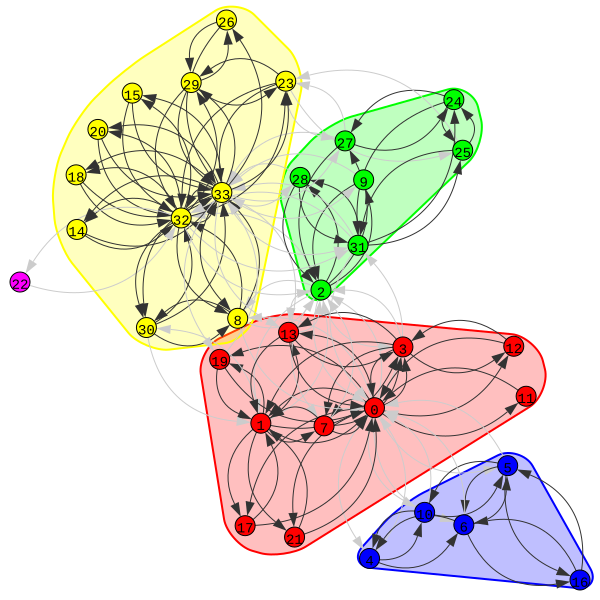

In [ ]:
# {"7_3"}
#Aus wie vielen Communities besteht karate?
print("Der Graph besteht aus", karate_cl_edgebtw.optimal_count,"Communities")
#Welche Knoten gehören zu welcher Community?
print(karate_cl_edgebtw.as_clustering())
#Plotten des Graphen mit hervorgehobenen Communities
plot(karate_cl_edgebtw.as_clustering(), mark_groups=True, vertex_label=graph_karate.vs.indices)

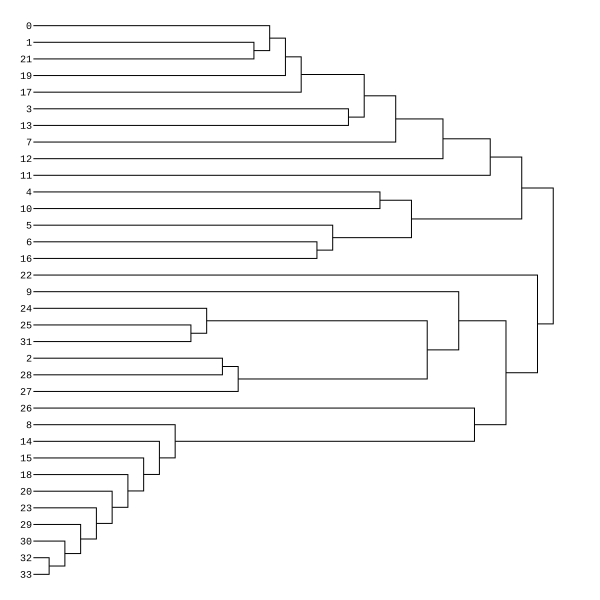

In [ ]:
#Plotten des Dendrogramms des Clusters.
plot(karate_cl_edgebtw)

Wie Sie sehen, stellt das Dendrogramm alle möglichen Ebenen des Clustering dar: Von der Unterteilung des Graphen in seine einzelnen Knoten als separate Communities (ganz unten) bis hin zur Betrachtung des Graphen als eine einzige Community (oberste Linie).

## b) Agglomerative Algorithmen - Label-Propagation-Algorithmus

### Aufgabe 7.4

Im Skript haben Sie bereits ein Beispiel für einen agglomerativen Algorithmus kennengelernt: den **Label-Propagation-Algorihmus**.  
In *'igraph'* wird dieser im Befehl *graph.community_label_propagation(weights, initial, fixed)* umgesetzt. Dabei können Gewichte verwendet werden und es kann auch ein Cluster definiert werden, welches zu Beginn des Algorithmus genutzt wird (*initial*). Das Argument *fixed* legt für diesen Fall die Knoten fest, deren Zuordnung im Laufe des Algorithmus nicht verändert werden darf. Diese letzten beiden Argumente werden wir im Folgenden jedoch nicht verwenden.

- - -
*Aufgabe*: Nutzen Sie im folgenden Code-Chunk den Label-Propagation-Algorithmus, um die Communities des Graphen *karate* zu ermitteln (ohne Berücksichtigung der Gewichte, d.h. *weights=None*).
- - -

In [ ]:
#{"7_4"}
#Wenden Sie den Label-Propagation-Algorithmus auf karate an
#und speichern Sie das Ergebnis in der Variable karate_cl_labelprop


#### Tipps

##### Tipp 1

Verwenden Sie den Befehl wie in der Beschreibung, mit dem Parameter *weights=None*

##### Lösung

karate_cl_labelprop = graph_karate.community_label_propagation(weights=None)

### Aufgabe 7.5

- - -
*Aufgabe*: Da der Label-Propagation-Algorithmus jedoch kein hierarchisches Clustering vornimmt, lässt sich aus der resultierenden Variable kein Dendrogram zeichnen. Wenden Sie daher den Visualisierungsbefehl *plot* im folgenden Code-Chunk an, um das Clustering des Label-Propagation-Algorithmus darzustellen.
- - -

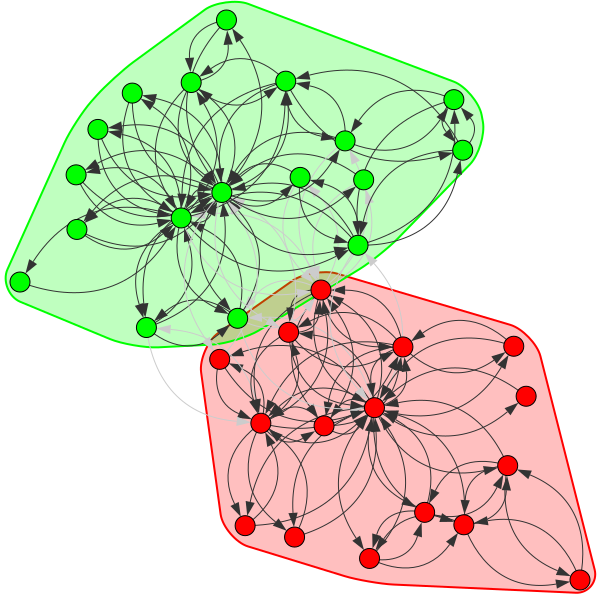

In [ ]:
#{"7_5"}
#Plotten Sie den Graphen mit hervorgehobenen Communities
plot(_____, mark_groups=True)

##### Lösung

plot(karate_cl_labelprop, mark_groups=True)

### Aufgabe 7.6

Der Label-Propagation-Algorithmus liefert für denselben Graphen nicht immer dieselbe Community-Struktur. Das liegt daran, dass die Zuteilung eines Labels zufällig erfolgt, falls mehrere Labels unter den Nachbarknoten gleich häufig vertreten sind. 
- - -
*Aufgabe*: Testen Sie dies, indem Sie den Befehl *cluster_label_prop* noch zwei weitere Male anwenden (jeweils ohne Berücksichtigung der Gewichte) und jeweils den Graphen mit der farblich hervorgehobenen jeweiligen Community-Struktur plotten.
- - -

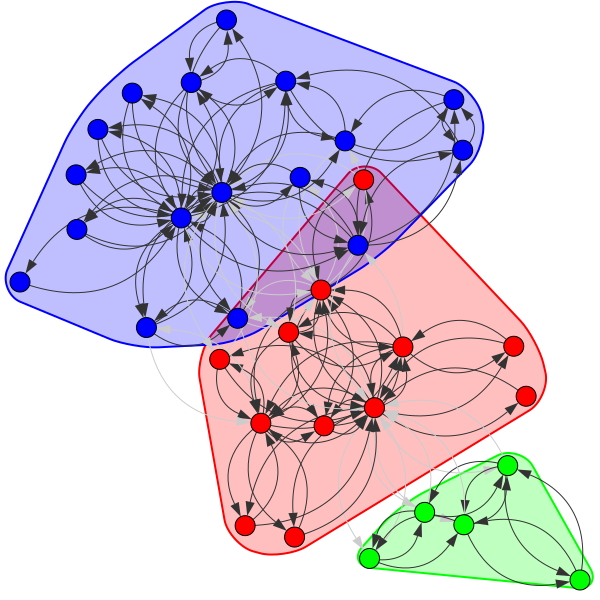

In [ ]:
#{"7_6"}
#Wenden Sie erneut den Label-Propagation-Algorithmus an und plotten Sie
#den Graphen mit der Community-Struktur (in einem Befehl)


#### Tipps

##### Tipp 1

Sie können den Befehl für den Label Propagation Algorithmus als Parameter des Plot Befehls angeben

##### Lösung

plot(graph_karate.community_label_propagation(weights=None), mark_groups=True)

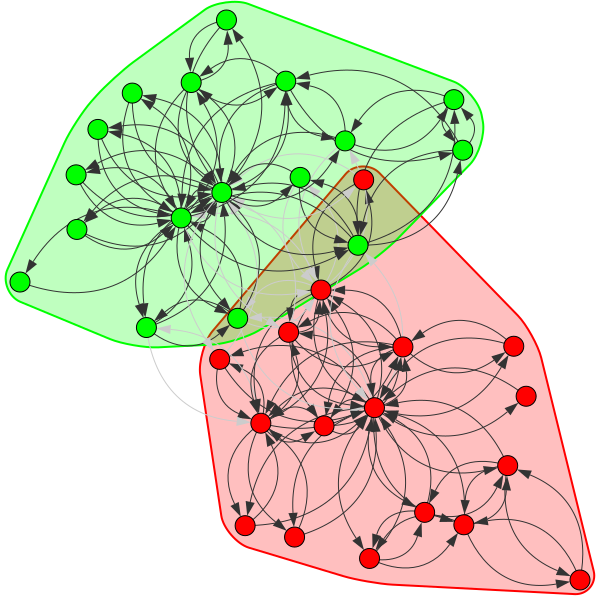

In [ ]:
#Wenden Sie ein drittes Mal den Label-Propagation-Algorithmus an und plotten Sie
#den Graphen mit der Community-Struktur (in einem Befehl)


# Exercise 8 -- Information Diffusion in Netzwerken

Die Erfassung und Analyse der Verbreitung von Informationen spielt nicht zuletzt auch für Unternehmen eine wichtige Rolle. In dieser Aufgabe werden Sie in Teil *a)* auf ein fiktives Beispiel die Theoriekenntnisse aus dem Skript anwenden, bevor Sie sich in Teil *b)* dann mit einem der beiden im Skript vorgestellten Modelle auseinandersetzen können.

## a) Information Diffusion: Ein Beispiel

### Aufgabe 8.1

Im Folgenden betrachten wir ein fiktives Beispiel für Information Diffusion. Die Datei *"InformationDiffExample.csv"* beschreibt, wer wem welche Information weitergegeben hat. Dabei werden zwei Informationen (*A* und *B*) betrachtet. Die Datei *"InformationDiffExample_nodes.csv"* gibt die Namen der Informationsüberträger an.  
Der folgende Code-Chunk lädt die beiden Dateien jeweils mit dem Befehl *pd.read_csv()*, speichert sie in den Variablen *data_diff* und *data_diff_nodes* und gibt sie aus. Führen Sie den Code aus.

In [ ]:
#{"8_1"}
#Laden des Datensatzes "InformationDiffExample.csv"
data_diff = pd.read_csv("InformationDiffExample.csv", sep=';')
#Laden des Datensatzes "InformationDiffExample_nodes.csv"
data_diff_nodes = pd.read_csv("InformationDiffExample_nodes.csv", sep=';')
#Ausgabe der Datensätze
print(data_diff)
print(data_diff_nodes)

FileNotFoundError: ignored

Wie Sie der Ausgabe des Data Frames entnehmen können, enthält der Data Frame *data_diff* eine Spalte, die angibt, welche *Information* über die Kante weitergegeben wird.

### Aufgabe 8.2

- - -
*Aufgabe*: Ihre Aufgabe ist es nun, im folgenden Code-Chunk einen Graphen zu erstellen, der die Informationsweitergabe als Kanten darstellt. Die Spalte *Information* wird hierbei automatisch als Kantenattribut übernommen. Plotten Sie anschließend den Graphen mit dem bereits gegebenen Code.

*Falls Sie sich an den Befehl zur Erstellung eines Graphen aus einem Data Frame nicht mehr erinnern, werfen Sie noch einmal einen Blick auf das Problem Set Nr. 1 Exercise 2.*
- - -

In [ ]:
#{"8_2"}
#Erstellen Sie einen gerichteten Graphen aus dem Data Frame data_diff
#und speichern Sie ihn in der Variable g_diff

#Plotten Sie den Graphen g_diff wie oben beschrieben
plot(g_diff, edge_label=EdgeSeq(g_diff)["Information"], edge_arrow_size=1)

NameError: ignored

#### Tipps

##### Tipp 1

Erinnern Sie sich an den Befehl der Form *Graph.DataFrame(daten, directed, vertices)

##### Lösung

g_diff = Graph.DataFrame(data_diff, directed=True, vertices = data_diff_nodes)

Quiz: Um was für einen Graphen handelt es sich beim Graphen g_diff?

- Interaktionsgraph

- Diffusionsgraph


#### Lösung

- Interaktionsgraph

### Aufgabe 8.3

Im nächsten Schritt wollen wir uns der Information *A* und ihrer Verbreitung im Netzwerk widmen. Das heißt, wir suchen den Graphen, der die Verbreitung der Information *A* darstellt. Der Befehl *graph.subgraph_edges(edges)* aus dem Package *'igraph'* bildet den Teilgraphen von *graph*, der die Kanten mit den in *eids* in einem Vektor angegebenen Indizes besitzt.

- - -
Führen Sie den folgenden Code aus und vollziehen Sie ihn nach.
- - -

In [ ]:
# {"8_3"}
#Erstellen Sie den Subgraphen zur Information A und
#speichern Sie ihn in der Variable g_diff_A
g_diff_A = g_diff.subgraph_edges(edges = [edge for edge in EdgeSeq(g_diff) if edge["Information"]=="A"])
#Plotten Sie den Subgraphen g_diff_A mit denselben
#Argumenten wie im vorherigen Code-Chunk
plot(g_diff_A, edge_label=EdgeSeq(g_diff)["Information"], edge_arrow_size=1)

Quiz: Um was für einen Graphen handelt es sich beim Graphen g_diff_A?

- Interaktionsgraph

- Diffusionsgraph


Im Skript haben Sie den Begriff **Quelle** kennengelernt. Er beschreibt einen Knoten im Diffusionsgraphen, der keine eingehenden Kanten besitzt und somit Informationen von sich aus verbreitet.

Quiz: Welche(r) Knoten ist (sind) im Graphen g_diff_A (eine) Quelle(n)? Geben Sie den (die) Namen des (der) Knoten in Anführungszeichen an. Falls Sie der Meinung sind, es gebe mehrere Quellen, so trennen Sie die Namen (jeweils in Anführunszeichen) bitte mit Komma und Leerzeichen voneinander und geben Sie sie in aufsteigender Reihenfolge an.



#### Lösung

- Diffusionsgraph
- "k1", "k5"

### Aufgabe 8.4

Der Graph *g_diff_A* ist von sehr überschaubarer Größe. Ein "Ablesen" der Quellen eines Diffusionsgraphen ist bei größeren Graphen leider sehr schwer möglich.
- - -
*Aufgabe*: Wenden Sie daher auf Basis der Definition die passenden Befehle an, um den Index (die Indizes) der Quelle(n) des Diffusionsgraphen *g_diff_A* zu bestimmen. Die notwendigen Schritte sind im Code-Chunk angegeben.
- - -

In [ ]:
#{"8_4"}
#Ermitteln Sie die In-Degrees der Knoten in g_diff_A und
#speichern Sie das Ergebnis in der Variable g_diff_A_indegree

#Ermitteln der Knotenindizes, für die g_diff_A_indegree 0 ist
np.where(np.array(g_diff_A_indegree)==0)

#### Tipps

##### Tipp 1

Erinnern Sie sich an den Befehl der Form *graph.degree(mode)*

##### Tipp 2

Geben Sie für den Parameter *mode* den Wert *in* an

##### Lösung

g_diff_A_indegree = g_diff_A.degree(mode="in")

### Aufgabe 8.5

Der Diffusionsgraph zur Information *A* besitzt also zwei Knoten, welche diese Information initial verbreiten. Welcher der beiden Knoten spielt dabei die wichtigere Rolle? Um diese Frage zu beantworten, betrachten wir die **Reichweite** der beiden Quellen.  
Hierzu gibt es verschiedene Herangehensweisen. Eine Möglichkeit ist, zunächst den Subgraph des Graphen *g_diff_A* zu bilden, welcher lediglich die jeweilige Quelle und die von ihr aus erreichbaren Knoten und zugehörigen gerichteten Kanten enthält. Nach dem Plotten kann man die Reichweite des Knotens aus der Grafik ablesen oder sich die Anzahl der Knoten des Graphen berechnen lassen.
Eine einfachere Möglichkeit ist es, den Befehl *graph.shortest_paths(source, mode)* auf den Diffusionsgraphen *g_diff_A* anzuwenden. Er gibt die Entfernung (Länge des kürzesten Pfades) von den Knoten in *source* zu allen anderen Knoten an. Alle Knoten, die nicht unendlich weit vom betrachteten Knoten entfernt sind (Entfernung nicht gleich *Inf*) sind daher vom betrachteten Knoten aus direkt oder indirekt erreichbar.
- - -
*Aufgabe*: Nutzen Sie diesen Ansatz im folgenden Code-Chunk, um die Reichweiten der beiden Quellen zu bestimmen. Nutzen Sie im Befehl die Namen der Quellen.
- - -

In [ ]:
# {"8_5"}
#Berechnen Sie die Entfernungen von Knoten k1 zu allen anderen
#Knoten und speichern Sie sie in der Variable dist_diff_A_1
dist_diff_A_1 = g_diff_A.shortest_paths(source=_____, mode=_____)[0]
#Lassen Sie sich die Variable dist_diff_A_1 ausgeben

#Führen Sie den Code aus, um zu überprüfen, ob für die Elemente von dist_diff_A_1
#die Bedingung "ungleich Inf" erfüllt ist
print(float("inf") in dist_diff_A_1)
#Führen Sie den Code aus, um die Anzahl der Elemente in 
#dist_diff_A_1 zu bestimmen, für die die Bedingung erfüllt ist
sum([elem for elem in dist_diff_A_1 if math.isinf(elem)==False])

#### Tipps

##### Tipp 1

Geben Sie für den Parameter *mode* den Wert *out* an

##### Lösung

Berechnen Sie die Entfernungen von Knoten k1 zu allen anderen Knoten und speichern Sie sie in der Variable dist_diff_A_1.
<br><br>*dist_diff_A_1 = g_diff_A.shortest_paths(source="k1", mode="out")[0]*
<br><br>Lassen Sie sich die Variable dist_diff_A_1 ausgeben.
<br><br>*print(dist_diff_A_1)*

### Aufgabe 8.6

Die Reichweite der Quelle *k1* beträgt also 8. Dabei wird die Quelle selbst automatisch mit berücksichtigt.  
Der folgende Code-Chunk berechnet analog die Reichweite von Knoten *k5*. Führen Sie den Code aus.

In [ ]:
# {"8_6"}
#Berechnung der Reichweite von Knoten k5
dist_diff_A_5 = g_diff_A.shortest_paths(source="k5", mode="out")[0]
sum([elem for elem in dist_diff_A_5 if math.isinf(elem)==False])

Die Reichweite der Quelle *k5* beträgt demnach 6 und ist somit geringer als die der Quelle *k1*.